#1  KNN으로 Hyperparameter Tuning 이해하기

1) Preprocessing / EDA
2) GridSearchCV
3) Evaluation


In [27]:
#일반적인 경고 메세지는 무시함
import warnings
warnings.filterwarnings("ignore")

In [28]:
#필요한 라이브러리 불러옴
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [29]:
#아이리스 데이터 불러오기
iris = load_iris()

In [30]:
X = iris.data
y = iris.target

In [31]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [32]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [33]:
feature = pd.DataFrame(X)
feature.columns = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
target = pd.DataFrame(y)
target.columns = ['Species']
data = pd.concat([feature,target],axis=1)
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# 1) Preprocessing & EDA

EDA

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

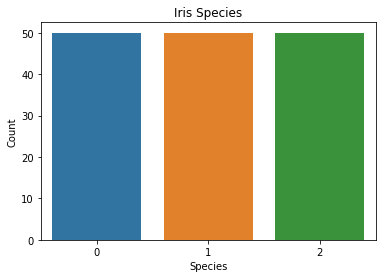

In [35]:
sns.countplot(data['Species'])
plt.title('Iris Species')
plt.ylabel ('Count')
plt.show()
#0: Setosa 1:Versicolor 2:Verginica
#세 종류가 동일한 비율로 있다

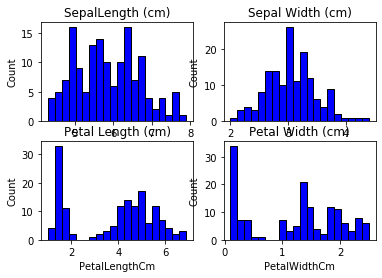

In [36]:
ax1 = plt.subplot(2,2,1)
ax1.hist(data['SepalLengthCm'], bins = 20,color = 'blue',edgecolor= 'black')
ax1.set_xlabel('SepalLengthCm')
ax1.set_ylabel('Count')
ax1.set_title('SepalLength (cm)')

ax2 = plt.subplot(2,2,2)
ax2.hist(data['SepalWidthCm'],  bins = 20,color = 'blue',edgecolor= 'black')
ax2.set_xlabel('SepalWidthCm')
ax2.set_ylabel('Count')
ax2.set_title('Sepal Width (cm)')

ax3 = plt.subplot(2,2,3)
ax3.hist(data['PetalLengthCm'],  bins = 20,color = 'blue',edgecolor= 'black')
ax3.set_xlabel('PetalLengthCm')
ax3.set_ylabel('Count')
ax3.set_title('Petal Length (cm)')

ax4 = plt.subplot(2,2,4)
ax4.hist(data['PetalWidthCm'],  bins = 20,color = 'blue',edgecolor= 'black')  
ax4.set_xlabel('PetalWidthCm')
ax4.set_ylabel('Count')
ax4.set_title('Petal Width (cm)')

plt.show()
#length, width 변수들의 값들이 어떻게 분포되어 있는지 히스토그램을 통해 확인했습니다!
#다양하게 분포되어 있는 것을 확인할 수 있습니다

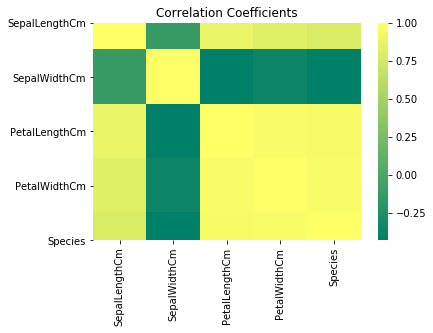

In [37]:
sns.heatmap(data.corr(),cmap = 'summer')
plt.title('Correlation Coefficients')
plt.show()
#상관관계를 보기 위해 heatmap을 사용했고 확인해보면
#Petal Length와 Petal width는 굉장히 큰 상관계수를 보였으므로 크게 관련이 있음을 확인할 수 있습니다
#그에 비해 Sepal Width와 Petal Width, Petal Length 사이의 상관계수는 굉장히 낮아 관련이 별로 없는 것을 확인했습니다
#Sepal Length와 Petal Length,Petal Width와도 꽤 높은 상관계수를 보였습니다

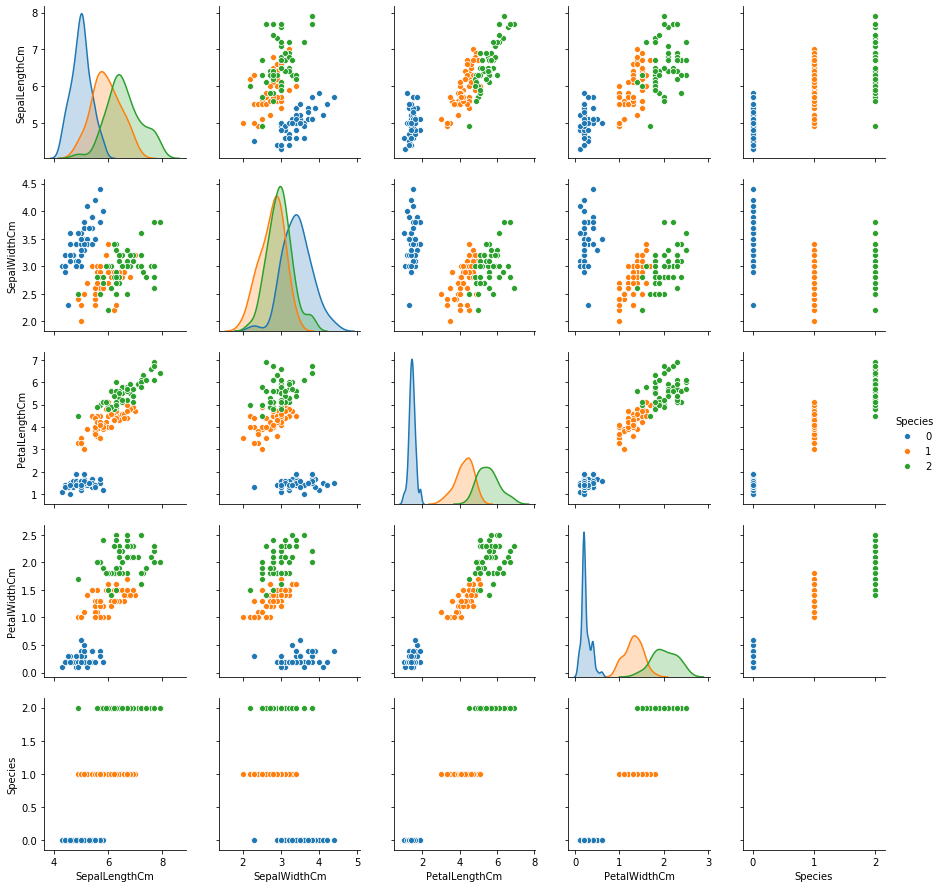

In [38]:
sns.pairplot(data, hue = 'Species')
plt.show()
#pairplot을 통해 species들에 따른 다양한 분포를 한번에 확인했는데
#보면 0에 해당하는 Setosa종이 아예 떨어져서 분포하고 있네요.. 
#그에비해 1:Versicolor와 2:Verginica는 쫌 겹쳐져서 분포하네요

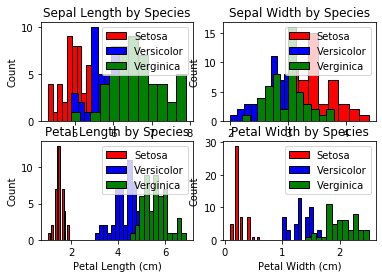

In [39]:
ax1 = plt.subplot(2,2,1)
ax1.hist(data[data['Species']==0].SepalLengthCm, bins = 12, label ='Setosa',edgecolor= 'black',color ='red')
ax1.hist(data[data['Species']==1].SepalLengthCm, bins = 12, label = 'Versicolor', edgecolor = 'black',color = 'blue')
ax1.hist(data[data['Species']==2].SepalLengthCm, bins = 12, label = 'Verginica', edgecolor = 'black',color = 'green')
ax1.set_title('Sepal Length by Species')
ax1.set_xlabel('Sepal Length (cm)')
ax1.set_ylabel('Count')
ax1.legend(loc = 'upper right')

ax2 = plt.subplot(2,2,2)
ax2.hist(data[data['Species']==0].SepalWidthCm, bins = 12, label ='Setosa',edgecolor= 'black',color ='red')
ax2.hist(data[data['Species']==1].SepalWidthCm, bins = 12, label = 'Versicolor', edgecolor = 'black',color = 'blue')
ax2.hist(data[data['Species']==2].SepalWidthCm, bins = 12, label = 'Verginica', edgecolor = 'black',color = 'green')
ax2.set_title('Sepal Width by Species')
ax2.set_xlabel('Sepal Width (cm)')
ax2.set_ylabel('Count')
ax2.legend(loc = 'upper right')

ax3 = plt.subplot(2,2,3)
ax3.hist(data[data['Species']==0].PetalLengthCm, bins = 12, label ='Setosa',edgecolor= 'black',color ='red')
ax3.hist(data[data['Species']==1].PetalLengthCm, bins = 12, label = 'Versicolor', edgecolor = 'black',color = 'blue')
ax3.hist(data[data['Species']==2].PetalLengthCm, bins = 12, label = 'Verginica', edgecolor = 'black',color = 'green')
ax3.set_title('Petal Length by Species')
ax3.set_xlabel('Petal Length (cm)')
ax3.set_ylabel('Count')
ax3.legend(loc = 'upper right')

ax4 = plt.subplot(2,2,4)
ax4.hist(data[data['Species']==0].PetalWidthCm, bins = 12, label ='Setosa',edgecolor= 'black',color ='red')
ax4.hist(data[data['Species']==1].PetalWidthCm, bins = 12, label = 'Versicolor', edgecolor = 'black',color = 'blue')
ax4.hist(data[data['Species']==2].PetalWidthCm, bins = 12, label = 'Verginica', edgecolor = 'black',color = 'green')
ax4.set_title('Petal Width by Species')
ax4.set_xlabel('Petal Width (cm)')
ax4.set_ylabel('Count')
ax4.legend(loc = 'upper right')

plt.show()

#히스토그램을 사용해서 종류에 따른 length, width 값의 분포를 확인하였습니다
#Sepal Length, Petal Length, Petal Width의 분포를 확인해보면 verginica가 전체적으로 가장 큰 종임을 확인할 수 있습니다
#그다음으로는 Versicolor, Setosa 순으로 큼을 확인하였습니다


In [40]:
#Scaling을 진행했습니다
from sklearn.preprocessing import StandardScaler

scal = StandardScaler()
X = scal.fit_transform(X)

In [41]:
# Train, Test 셋 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 48)

In [42]:
#y변수는 범주형변수이므로 one hot encoding을 진행합니다
y_train = pd.get_dummies(y_train)

In [43]:
y_test = pd.get_dummies(y_test)

In [44]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((120, 4), (30, 4), (120, 3), (30, 3))

# 2) GridSearchCV
실습코드를 참고하였습니다!

In [45]:
#KNN을 사용할 때 필요한 hyperparameter k를 구하기 위한 gridsearch를 사용
#그리드 서치란 격자무늬로 hyperparameter를 탐색하는 방법
#모든 파라미터의 경우의 수에 대해 cross-validation 결과가 가장 좋은 parameter를 고른다
from sklearn.model_selection import GridSearchCV

In [82]:
grid_params = {
    'n_neighbors': [3,5,7,11,19],
    'weights' : ['uniform', 'distance'],
    'metric' :  ['euclidean','minkowski']
}

In [83]:
gs = GridSearchCV(KNeighborsClassifier(),grid_params,verbose = 1, cv = 3, n_jobs = -1)

In [84]:
gs_results = gs.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.2s finished


In [85]:
#가장 좋은 결과를 얻는 그리드를 출력함
print("Best Parameters: {}".format(gs.best_params_))
#이로서 parameter들을 구할 수 있었고 k의 값이 5일때 좋다는 걸 알았습니다

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}


In [86]:
#grid_search의 최종 스코어를 출력함
print("Best Cross-validity Score: {:.3f}".format(gs.best_score_))

Best Cross-validity Score: 0.950


In [87]:
#Test 데이터에 대해 grid_search 알고리즘을 적용하여 score을 확인하였습니다
print("Test set Score: {:.3f}".format(gs.score(X_test, y_test)))
#accuracy 0.867이 나왔습니다

Test set Score: 0.900


In [ ]:
#구한 파라미터 k=5를 사용하여 accuracy를 다시 구해보았습니다

In [92]:
#build KNN model(k=5)
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')

In [93]:
# train the model
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [94]:
# get the predict value(y_pred) from X_test
y_pred = knn.predict(X_test)

# 3) Evaluation

In [95]:
print('accuacy', knn.score(X_test, y_test))

accuacy 0.9
